In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('./Datasets/Mall_Customers.csv')

In [8]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
# GETTING SOME BASIC INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# CHOOSING THE ANNUAL INCOME COL AND SPENDING SCORE COLUMN
X=df.iloc[:,[3,4]].values

CHOOSING THE NUM OF CLUSTERS

In [10]:
#  FINDNG WCSS VALUE FOR DIFF NUM OF CLUSTERS
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

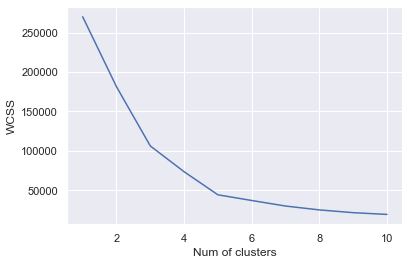

In [11]:
# PLOT THE ELBOW GRAPH
sns.set()
plt.plot(range(1,11), wcss)
plt.xlabel('Num of clusters')
plt.ylabel('WCSS')
plt.show()

Optimum no. of clusters=5

In [18]:
# TRAINING THE K-MEANS CLUSTERING MODEL
kmeans=KMeans(n_clusters=5, init='k-means++', random_state=42)
# return the label to for each data point on their cluster
Y= kmeans.fit_predict(X)
print(Y)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


VISUALIZING THE CLUSTERS


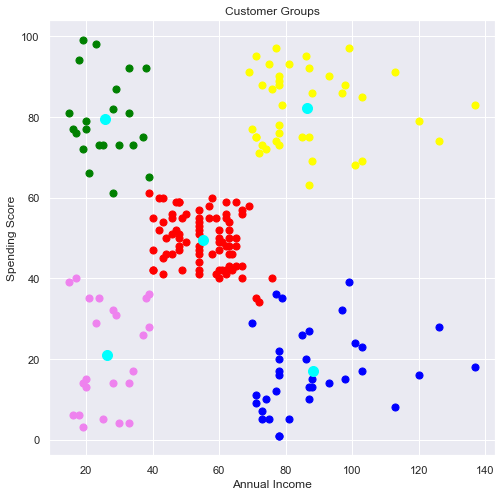

In [19]:
#PLOTING ALL THE CLUSTERS AND THEIR CENTROIDS
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], c='green', label='Cluster 1', s=50)
plt.scatter(X[Y==1,0], X[Y==1,1], c='red', label='Cluster 2', s=50)
plt.scatter(X[Y==2,0], X[Y==2,1], c='yellow', label='Cluster 3', s=50)
plt.scatter(X[Y==3,0], X[Y==3,1], c='violet', label='Cluster 4', s=50)
plt.scatter(X[Y==4,0], X[Y==4,1], c='blue', label='Cluster 5', s=50)

# PLOT THE CENTROIDS
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()